#Ejercicio de clasificación con K-means manual usando la distancia de Manhathan (o del taxista):

Importamos las librerías requeridas:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Se importan también los datos necesitados correspondientes a los datos ya procesados:

In [11]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS7dPZu3VcPsEfmQ7vrhVc38TPipvQo0Ol9rElCa9AJyEGwMV18iDB2SPg71GOeB4fFY7krDf0ake9i/pub?output=csv'
datos = pd.read_csv(url)

Transformándolo a un arreglo:

In [12]:
X_ = datos.values

##PCA:

Ahora se crea un PCA, para ajustar unos datos como principales pidiendo las tres primeras componentes principales.

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
X_pca= pca.fit_transform(X_)

##Implementación manual de K-means usando la distancia de Manhathan:

In [15]:
import random

def distancia_taxista(x, c):
  return np.sum(np.abs(x - c))

k = 4
dimension = X_.shape[0]
centroids_taxi = X_[random.sample(range(dimension), k)]
clusters_taxi = np.zeros(dimension)
distancias = np.zeros((dimension, k))

tol = 1e-6
error = 100

while error > tol:
    for i in range(dimension):
        for j in range(k):
            distancias[i, j] = distancia_taxista(X_[i], centroids_taxi[j])
        clusters_taxi[i] = np.argmin(distancias[i])

    centroids_taxi_prev = np.copy(centroids_taxi)

    for l in range(k):
        puntos_cluster = X_[clusters_taxi == l]

        if len(puntos_cluster) > 0:
            centroids_taxi[l] = np.mean(puntos_cluster, axis=0)
        else:
            print(f"Cluster {l} vacío, reasignando centroide aleatoriamente")
            centroids_taxi[l] = X_[np.random.choice(dimension)]

    error = np.mean([distancia_taxista(centroids_taxi[l], centroids_taxi_prev[l]) for l in range(k)])
    print(error)

272.5544199183818
145.37935354536938
121.11598734358122
31.379865177695205
17.488552774633575
11.007964521231582
7.579940901481978
5.79322614284432
4.638678993959903
3.5677530326672633
2.8953813949058134
2.772299720326549
2.4398477721577336
1.9029564273841193
1.519922891622612
1.1153127188986969
0.9065948140944662
0.7496222649708435
0.5559098266676716
0.5260684956140098
0.4212103281500851
0.4899566112689776
0.1968476276354184
0.18617034466037438
0.20773081737937749
0.093053750419955
0.07971430576219812
0.03523545310790985
0.02859318122186902
0.028909981240361426
0.026947643579706138
0.0


Se ajustan los centroides para la gráfica, los cuales pasan de 45 dimensiones a 3, gracias al PCA.

In [16]:
centroids_taxi = np.array(centroids_taxi)
centroids_taxi = pca.transform(centroids_taxi)
centroids_taxi

array([[  1.8097093 ,  50.62906632, -17.69082348],
       [-58.79470776,   3.35045491,  22.93618135],
       [-17.11726048, -49.88720671, -21.33468183],
       [207.53624617, -14.95768587,  30.71744999]])

##Gráficas:

Se organizan los *clusters* para su visualización como tipo entero (int):

In [17]:
clusters_taxi = clusters_taxi.astype(int)

###Gráfica 2d:

Se declara la función para hacer un gráfico de dispersión en 2d, usando las dos primeras componentes:

In [18]:
def graficar_clusters_taxi_PCA2D(clusters, metodo, centroids):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                    hue=clusters, palette='PRGn',
                    alpha=0.6, s = 100)
    plt.scatter(centroids_taxi[:,0], centroids_taxi[:,1], c= 'black', s = 100, label = 'Centroides')
    plt.title(f'Visualización 2D de la Clusterización (PCA) {metodo}', fontsize=16)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.grid(linestyle = '-', alpha  = 0.5)
    plt.legend(title='Cluster')
    plt.show()

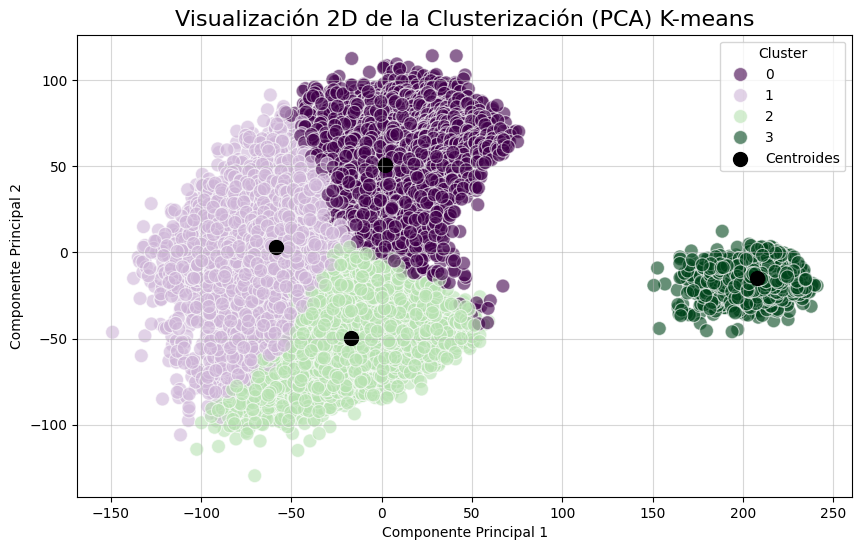

In [19]:
kmeans_taxi_2D = graficar_clusters_taxi_PCA2D(clusters_taxi, 'K-means', centroids_taxi)

###Gráfica 3D:

Realizando la función para graficar en 3D, pero inicialmente se importa el método Axes 3D de mpl_toolkits.

In [20]:
from mpl_toolkits.mplot3d import Axes3D

def graficar_clusters_PCA3D(clusters, metodo):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2],
                       c=clusters, cmap='PRGn',
                       alpha=0.6)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')

    legend1= ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster")
    ax.add_artist(legend1)
    plt.show()

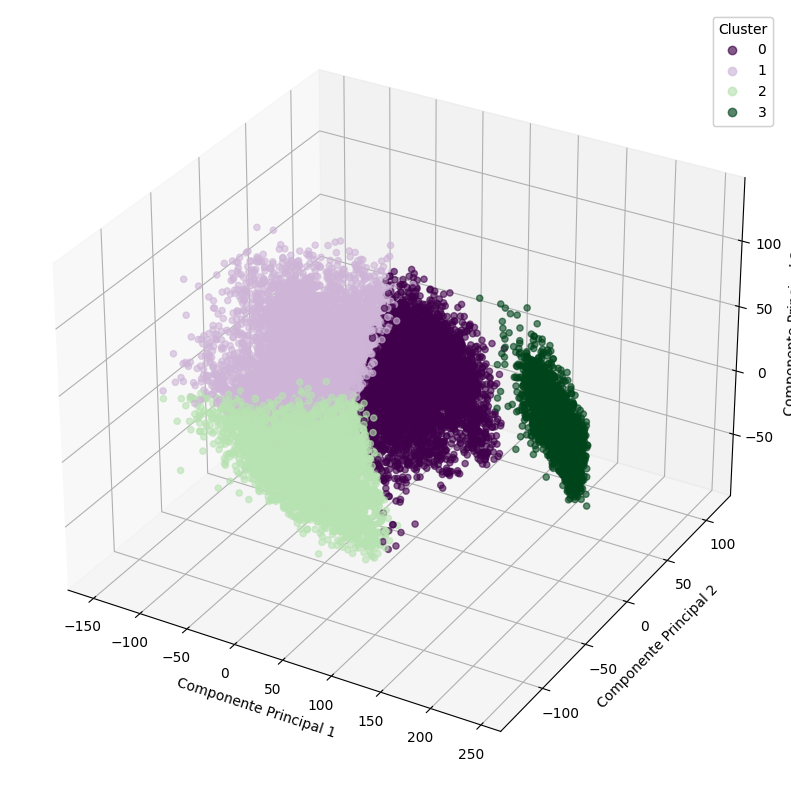

In [21]:
graficar_clusters_PCA3D(clusters_taxi, 'K-means')